<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/PadraoXFracionario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#http://www.b3.com.br/data/files/C8/F3/08/B4/297BE410F816C9E492D828A8/SeriesHistoricas_Layout.pdf
import pandas as pd
import statistics
import requests
import os
import zipfile
import random

In [5]:
ano = 2021
url = 'https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A{:4d}.ZIP'.format(ano)

os.chdir('/home/yair/GHub/Codigos-em-financas/data')
download = requests.get(url)


In [6]:
data =  pd.read_csv('COTAHIST_A{:4d}.ZIP'.format(ano),compression='zip',header=None) 
data

,0
0,00COTAHIST.2021BOVESPA 20211230 ...
1,012021010402A1AP34 010ADVANCE AUTODRN ...
2,012021010402A1BB34 010ABB LTD DRN ...
3,012021010402A1BM34 010ABIOMED INC DRN ...
4,012021010402A1CR34 010AMCOR PLC DRN ...
...,...
1831859,012021111278BBASA340 070BBAS ON ...
1831860,012021111878BBASA340 070BBAS ON ...
1831861,012021111978BBASA340 070BBAS ON ...
1831862,012021112278BBASA340 070BBAS ON ...


In [7]:
n=726
data.iloc[n][0]

'012021012902PETZ3       010PETZ        ON      NM   R$  000000000216100000000021880000000002085000000000213900000000021500000000002137000000000215010932000000000002309800000000004940882700000000000000009999123100000010000000000000BRPETZACNOR2101'

CODNEG - CÓDIGO DE NEGOCIAÇÃO DO PAPEL (12) 13:24

In [8]:
for n in  random.choices(range(0,len(data)),k=5):
    papel=data.iloc[n][0][12:24]
    print(n,papel)

164737 SULA11      
1158265 BEEFJ880    
1367855 GGBRV303    
1630301 WIZSA960    
231239 BBASB371    


PREÇO DE ABERTURA DO PAPELMERCADO NO PREGÃO (11) [57:69]
PREÇO MÁXIMO DO PAPELMERCADO NO PREGÃO (11) [70:82]
PREÇO MÍNIMO DO PAPELMERCADO NO PREGÃO (11) [83:95]
PREÇO DO ÚLTIMO NEGÓCIO DO PAPEL-MERCADO NO PREGÃO (11) [109:121]

In [29]:
n=865726
open=data.iloc[n][0][56:69]
max=data.iloc[n][0][69:82]
min=data.iloc[n][0][82:95]
close=data.iloc[n][0][108:121]

print(open,max,min,close)

0000000001460 0000000001492 0000000001447 0000000001486


DATA DO PREGÃO FORMATO “AAAAMMDD” (08) 03:10

In [30]:
dia = data.iloc[n][0][2:10]
dia

'20210824'

In [11]:
papel = ['NTCO3F', 'NTCO3']

In [32]:
dataMinF=[]
dataMaxF=[]
dataMinP=[]
dataMaxP=[]
dataOpenF=[]
dataOpenP=[]
dataCloseF=[]
dataCloseP=[]
for n in range (0,len(data)):
  if papel[0] in data.iloc[n][0][12:24] :
    dataMinF.append([data.iloc[n][0][2:10] ,int(data.iloc[n][0][82:95])/100])
    dataMaxF.append([data.iloc[n][0][2:10] ,int(data.iloc[n][0][69:82])/100])
    dataOpenF.append([data.iloc[n][0][2:10] ,int(data.iloc[n][0][56:69])/100])
    dataCloseF.append([data.iloc[n][0][2:10] ,int(data.iloc[n][0][108:121])/100])
  if papel[1] in data.iloc[n][0][12:24] :
    dataMinP.append([data.iloc[n][0][2:10] ,int(data.iloc[n][0][82:95])/100])
    dataMaxP.append([data.iloc[n][0][2:10] ,int(data.iloc[n][0][69:82])/100])
    dataOpenP.append([data.iloc[n][0][2:10] ,int(data.iloc[n][0][56:69])/100])
    dataCloseP.append([data.iloc[n][0][2:10] ,int(data.iloc[n][0][108:121])/100])

In [43]:
min=[]
for f in dataMinF : 
    for p in dataMinP:
        if p[0] == f[0] : min.append([p[1],f[1]])

max=[]
for f in dataMaxF : 
    for p in dataMaxP:
        if p[0] == f[0] : max.append([p[1],f[1]])

open=[]
for f in dataOpenF : 
    for p in dataOpenP:
        if p[0] == f[0] : open.append([p[1],f[1]])

close=[]
for f in dataCloseF : 
    for p in dataCloseP:
        if p[0] == f[0] : close.append([p[1],f[1]])        

In [45]:
Dif = pd.DataFrame()
Dif['Min']   = [abs(x[0] - x[1]) for x in min]
Dif['Max']   = [abs(x[0] - x[1]) for x in max]
Dif['Open']  = [abs(x[0] - x[1]) for x in open]
Dif['Close'] = [abs(x[0] - x[1]) for x in close]

In [46]:
Dif.describe()

,Min,Max,Open,Close
count,1122.000000,1122.000000,1122.000000,1122.000000
mean,0.717540,0.482736,0.613271,0.441319
std,0.866578,0.717857,0.795462,0.601937
min,0.000000,0.000000,0.000000,0.000000
25%,0.010000,0.000000,0.020000,0.020000
50%,0.445000,0.160000,0.330000,0.190000
75%,1.137500,0.730000,0.890000,0.650000
max,5.810000,5.760000,5.770000,5.160000


In [53]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(x=Dif['Min'] , name='Min' , boxmean='sd') )
fig.add_trace(go.Box(x=Dif['Open'] , name='Open', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Close'] , name ='Close', boxmean='sd'))
fig.add_trace(go.Box(x=Dif['Max'] , name='Max', boxmean='sd'))

fig.update_layout(
    title= 'boxplot com media e dp da diferença de preço Fracionário x Padrão de {}'.format(papel[1]),
    xaxis=dict(
        showgrid=True,
        zeroline=True,
        dtick=.1,
        gridwidth=2,
    ),
)

fig.show()

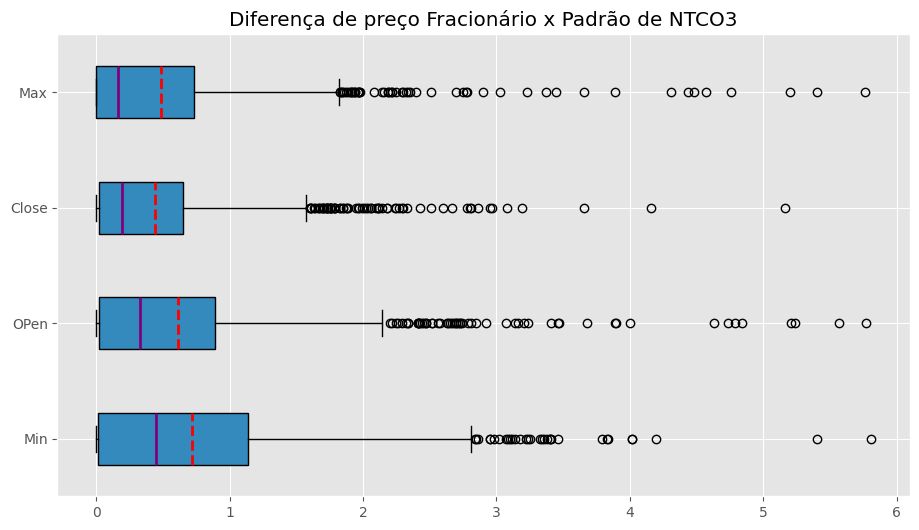

In [55]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(11, 6))
ax.boxplot((Dif['Min'], Dif['Open'] , Dif['Close'] , Dif['Max']), vert=False, showmeans=True, meanline=True,
           labels=('Min', 'OPen' , 'Close' , 'Max'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
ax.set_title('Diferença de preço Fracionário x Padrão de {}'.format(papel[1]))
plt.show()

In [29]:
from b3fileparser import b3parser


dados_b3 = b3parser.read_b3_file('COTAHIST_A2021.TXT')
dados_b3

/home/yair/bin/miniconda3/lib/python3.11/site-packages/b3fileparser/b3parser.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  b3_data[col] = pd.to_datetime(b3_data[col], errors='coerce')


,TIPO_DE_REGISTRO,DATA_DO_PREGAO,CODIGO_BDI,CODIGO_DE_NEGOCIACAO,TIPO_DE_MERCADO,NOME_DA_EMPRESA,ESPECIFICACAO_DO_PAPEL,PRAZO_EM_DIAS_DO_MERCADO_A_TERMO,MOEDA_DE_REFERENCIA,PRECO_DE_ABERTURA,...,NUMERO_DE_NEGOCIOS,QUANTIDADE_NEGOCIADA,VOLUME_TOTAL_NEGOCIADO,PRECO_DE_EXERCICIO,INDICADOR_DE_CORRECAO_DE_PRECOS,DATA_DE_VENCIMENTO,FATOR_DE_COTACAO,PRECO_DE_EXERCICIO_EM_PONTOS,CODIGO_ISIN,NUMERO_DE_DISTRIBUICAO
1,1,2021-01-04,LOTE_PADRAO,A1AP34,VISTA,ADVANCE AUTO,DRN,-1,R$,51.10,...,22.0,6420.0,333558.7,0.00,0,NaT,1,0.0,BRA1APBDR001,105
2,1,2021-01-04,LOTE_PADRAO,A1BB34,VISTA,ABB LTD,DRN,-1,R$,36.80,...,22.0,50.0,2146.7,0.00,0,NaT,1,0.0,BRA1BBBDR009,100
3,1,2021-01-04,LOTE_PADRAO,A1BM34,VISTA,ABIOMED INC,DRN,-1,R$,409.42,...,19.0,320.0,135379.6,0.00,0,NaT,1,0.0,BRA1BMBDR006,100
4,1,2021-01-04,LOTE_PADRAO,A1CR34,VISTA,AMCOR PLC,DRN,-1,R$,58.50,...,4.0,1100.0,65925.5,0.00,0,NaT,1,0.0,BRA1CRBDR003,101
5,1,2021-01-04,LOTE_PADRAO,A1EE34,VISTA,AMEREN CORP,DRN,-1,R$,199.60,...,1.0,400.0,79840.0,0.00,0,NaT,1,0.0,BRA1EEBDR007,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831858,1,2021-11-11,OPCOES_DE_COMPRA,BBASA340,OPCOES_DE_COMPRA,BBAS,ON NM,0,R$,0.80,...,4.0,12700.0,10160.0,34.04,0,2022-01-21,1,0.0,BRBBASACNOR3,301
1831859,1,2021-11-12,OPCOES_DE_COMPRA,BBASA340,OPCOES_DE_COMPRA,BBAS,ON NM,0,R$,0.59,...,1.0,800.0,472.0,34.04,0,2022-01-21,1,0.0,BRBBASACNOR3,301
1831860,1,2021-11-18,OPCOES_DE_COMPRA,BBASA340,OPCOES_DE_COMPRA,BBAS,ON NM,0,R$,0.34,...,4.0,26500.0,9515.0,34.04,0,2022-01-21,1,0.0,BRBBASACNOR3,301
1831861,1,2021-11-19,OPCOES_DE_COMPRA,BBASA340,OPCOES_DE_COMPRA,BBAS,ON NM,0,R$,0.38,...,3.0,13500.0,4400.0,34.04,0,2022-01-21,1,0.0,BRBBASACNOR3,301


In [30]:
dados = b3parser.read_b3_file('COTAHIST_A2021.TXT')
puts = dados[dados['TIPO_DE_MERCADO'] == 'OPCOES_DE_VENDA']
putspetro = puts[puts['CODIGO_DE_NEGOCIACAO'].str.startswith('PETR')]
putspetro.head()

/home/yair/bin/miniconda3/lib/python3.11/site-packages/b3fileparser/b3parser.py:38: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  b3_data[col] = pd.to_datetime(b3_data[col], errors='coerce')


,TIPO_DE_REGISTRO,DATA_DO_PREGAO,CODIGO_BDI,CODIGO_DE_NEGOCIACAO,TIPO_DE_MERCADO,NOME_DA_EMPRESA,ESPECIFICACAO_DO_PAPEL,PRAZO_EM_DIAS_DO_MERCADO_A_TERMO,MOEDA_DE_REFERENCIA,PRECO_DE_ABERTURA,...,NUMERO_DE_NEGOCIOS,QUANTIDADE_NEGOCIADA,VOLUME_TOTAL_NEGOCIADO,PRECO_DE_EXERCICIO,INDICADOR_DE_CORRECAO_DE_PRECOS,DATA_DE_VENCIMENTO,FATOR_DE_COTACAO,PRECO_DE_EXERCICIO_EM_PONTOS,CODIGO_ISIN,NUMERO_DE_DISTRIBUICAO
607894,1,2021-03-09,OPCOES_DE_VENDA,PETRU269,OPCOES_DE_VENDA,PETRE,PN N2,0,R$,6.27,...,1.0,205000.0,1285350.0,27.00,0,2021-09-17,1,0.0,BRPETRACNPR6,197
610934,1,2021-05-17,OPCOES_DE_VENDA,PETRP260,OPCOES_DE_VENDA,PETRE FM,PN N2,0,R$,3.14,...,7.0,66200.0,207222.0,26.21,0,2022-04-14,1,0.0,BRPETRACNPR6,199
610935,1,2021-05-19,OPCOES_DE_VENDA,PETRP260,OPCOES_DE_VENDA,PETRE FM,PN N2,0,R$,3.24,...,27.0,14100.0,45463.0,26.21,0,2022-04-14,1,0.0,BRPETRACNPR6,199
610936,1,2021-05-20,OPCOES_DE_VENDA,PETRP260,OPCOES_DE_VENDA,PETRE FM,PN N2,0,R$,3.22,...,17.0,3300.0,10677.0,26.21,0,2022-04-14,1,0.0,BRPETRACNPR6,199
610937,1,2021-06-15,OPCOES_DE_VENDA,PETRP291,OPCOES_DE_VENDA,PETRE,PN N2,0,R$,3.08,...,2.0,600.0,1847.0,29.21,0,2022-04-14,1,0.0,BRPETRACNPR6,199
